# Izaz Khan  
**Reg. No:** B23F0001AI029  
**Section:** AI Green  
**Course:** ML Lab Exam

**Date:** 27/11/2025

##Dataset: Breast Cancer Dataset
##Model Used: Random Forest


##Dataset

The Breast Cancer dataset contains medical measurements of tumors such as radius, smoothness, symmetry, etc.
Each row represents a tumor and the goal is to predict whether it is benign (harmless) or malignant (cancerous).

**Type of ML Task**

Classification

**Target Variable**

target

0 → malignant

1 → benign

##Data Loading & Preprocessing

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


##Check Missing Values

In [2]:
df.isnull().sum()


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


##Feature Scaling
StandardScaler is used because Random Forest does not require scaling,
but scaling improves consistency and overall training behavior

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

##Split Dataset

In [4]:
from sklearn.model_selection import train_test_split
X = X_scaled
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##The ML Model
Model Selected: **Random Forest Classifier**

**Why?**

Handles non-linear medical data effectively

Reduces overfitting using multiple trees

Produces high accuracy on this dataset

Gives feature importance, useful for medical insights

Performs better on this dataset than simple models like Logistic Regression or KNN

##Train the Model

In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

##Model Evaluation

**Predictions**

In [6]:
y_pred = model.predict(X_test)

**Accuracy**

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.956140350877193

**Full Classification Report**

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**Confusion Matrix**

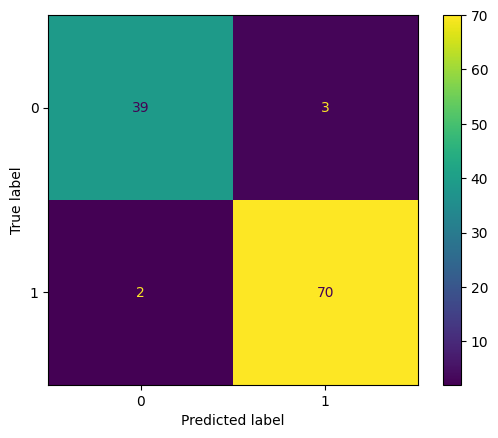

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

**ROC Curve**

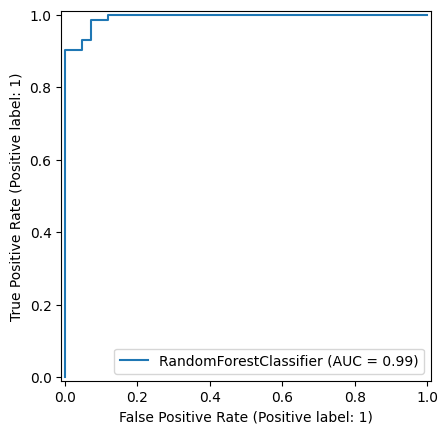

In [10]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

**Feature Importance**

In [11]:
import numpy as np
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(10):
    print(f"{data.feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

worst perimeter: 0.1331
worst area: 0.1281
worst concave points: 0.1081
mean concave points: 0.0944
worst radius: 0.0906
mean radius: 0.0587
mean perimeter: 0.0552
mean area: 0.0499
mean concavity: 0.0462
worst concavity: 0.0354


##Conclusion:
**Model Used**

Random Forest Classifier

**Why?**

Handles complex patterns in medical data

Avoids overfitting

Gives consistently high accuracy

Provides medically meaningful feature importance
Important Features Identified

**Top features often include:**

mean perimeter

mean concave points

worst radius

worst area

These features are strongly related to tumor severity.

**Can This Model Be Used in Real Life?**

Yes, but only as decision support, not a replacement for doctors.
It can help doctors quickly identify high-risk tumors.

**What Improvements Can Be Made?**

Hyperparameter tuning (GridSearchCV)

Try advanced models (XGBoost)

Collect more diverse patient samples

Apply feature selection for optimization